# 淘宝商品比价定向爬虫

    1. 提交商品搜索请求，通过’下一页’循环获取页面；
    2. 对于每个页面，提取商品信息和价格信息；
    3. 将信息可视化到屏幕。

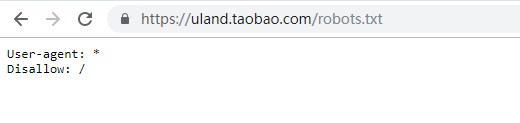

In [22]:
import requests
import re
    
def getHTMLText(url):
    try:
        kv = {'user-agent':'Chrome/10'}
        r = requests.get(url, headers=kv, timneout=30)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return 'Error 0!'
    
def parsePage(ilt, html):
    try:
        plt = re.findall(r'\"view_price\"\:\"[\d\.]*\"', html)
        tlt = re.finaall(r'\"raw_title\"\:\".*?\"', html)
        for i in range(len(plt)):
            price = eval(plt[i].split(':')[1])
            title = eval(tlt[i].split(':')[1])
            ilt.append([price, title])
    except:
        print('Error 1!')
    
def printGoodslist(ilt):
    tplt = "{:4}\t{:8}\t{:16}"
    print(tplt.format("序号", "价格", "名称"))
    count = 1
    for i in ilt:
        print(tplt.format(count, i[0], i[1]))
        count += 1
    
def main(goods, depth, url_i):
    satrt_url = url_i + goods
    infoList = []
    for i in range(depth):
        try:
            url = start_url + '&s=' + str(44*i)
            html = getHTMLText(url)
            parsePage(infoList, html)
        except:
            continue
    printGoodslist(infoList) 

In [23]:
url_i = 'https://s.taobao.com/search?q='
main('marvel', 2, url_i)

序号  	价格      	名称              


#重点复习：
    1. r.raise_for_status -> r.raise_for_status()
    2. 'User-agent'       -> 'user-agent'
    3. requests           -> requests.get()
    4. http               -> https

#需要登录

# 股票数据定向爬虫

In [29]:
import re
import requests
from bs4 import BeautifulSoup
import traceback

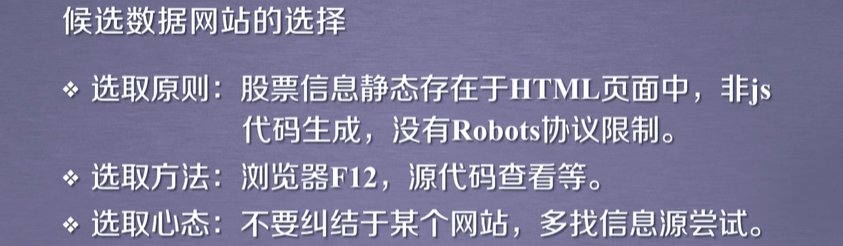

view sources + Ctrl+F

In [44]:
def getHTMLText(url, code="utf-8"):
    try:
        r = requests.get(url)
        r.raise_for_status()
        r.encoding = code
        return r.text
    except:
        return ""

def getStockList(lst, stockURL):
    html = getHTMLText(stockURL, "GB2312")
    soup = BeautifulSoup(html, 'html.parser') 
    a = soup.find_all('a')
    for i in a:
        try:
            href = i.attrs['href']
            lst.append(re.findall(r"[s][hz]\d{6}", href)[0])
        except:
            continue

def getStockInfo(lst, stockURL, fpath):
    count = 0
    for stock in lst:
        url = stockURL + stock + ".html"
        html = getHTMLText(url)
        try:
            if html=="":
                continue
            infoDict = {}
            soup = BeautifulSoup(html, 'html.parser')
            stockInfo = soup.find('div', attrs={'class':'stock-bets'})
            
            name = stockInfo.find_all('a', attrs={'class':'bets-name'})[0]
            infoDict.update({'股票名称': name.text.split()[0]}) # 获得完整股票名称
            
            keyList = stockInfo.find_all('dt')
            valueList = stockInfo.find_all('dd')
            for i in range(len(keyList)):
                key = keyList[i].text
                val = valueList[i].text
                infoDict[key] = val
            
            with open(fpath, 'a', encoding='utf-8') as f:
                f.write( str(infoDict) + '\n' )
                count = count + 1
                print("\r当前进度: {:.2f}%".format(count*100/len(lst)),end="")
        except:
            traceback.print_exc()
            count = count + 1
            print("\r当前进度: {:.2f}%".format(count*100/len(lst)),end="")
            continue

def main():
    stock_list_url = 'https://quote.eastmoney.com/stocklist.html'
    stock_info_url = 'https://gupiao.baidu.com/stock/'
    output_file = 'H:/Webcrawler_file/BaiduStockInfo.txt'
    slist=[]
    getStockList(slist, stock_list_url)
    getStockInfo(slist, stock_info_url, output_file)

main()

当前进度: 100.00%

Traceback (most recent call last):
  File "<ipython-input-44-90060a2c088d>", line 35, in getStockInfo
    infoDict.update({'股票名称': name.string.split()[0]}) # 获得完整股票名称
AttributeError: 'NoneType' object has no attribute 'split'


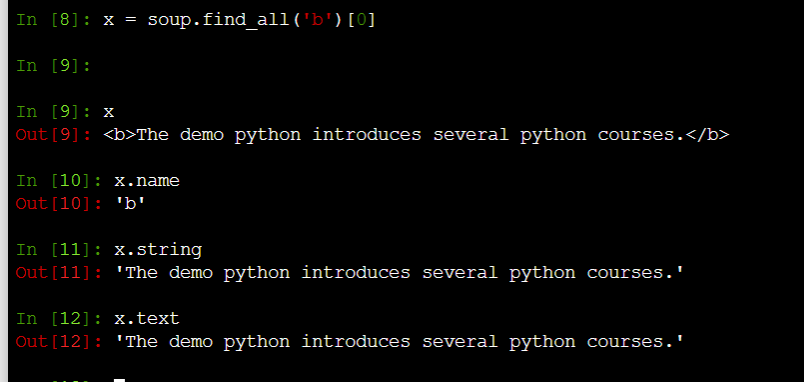